# Trabajo práctico integrador - Aprendizaje de Máquinas I
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martín
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz
* Ruíz Otondo, Juan

In [8]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error
from sklearn.decomposition import PCA

## Dataset

In [2]:
# Importa CSV del dataset
df = pd.read_csv('spotify_songs.csv')

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Fuentes

__*Original dataset:*__

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

__*API scraper repository:*__

https://github.com/charlie86/spotifyr/

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


## Exploración y Comprensión de los Datos

In [3]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [6]:
df.tail(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.742,0.0894,127.984,337500


## Técnicas de Visualización

Nos interesa ver específicamente la relación entre 'track_popularity' y distintas features musicales.

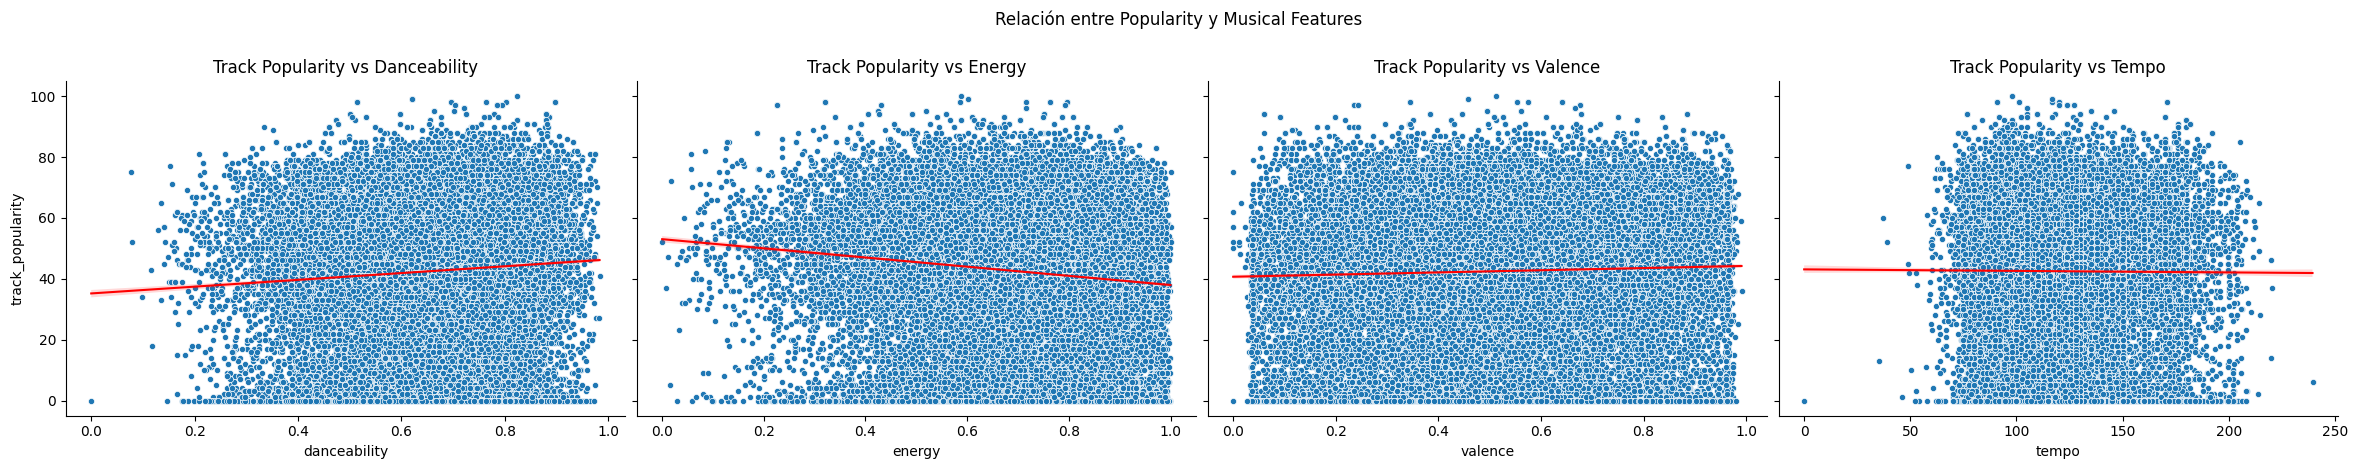

In [7]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,
                 kind='scatter',
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlación es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una mínima correlación, pero no llega a ser determinante.

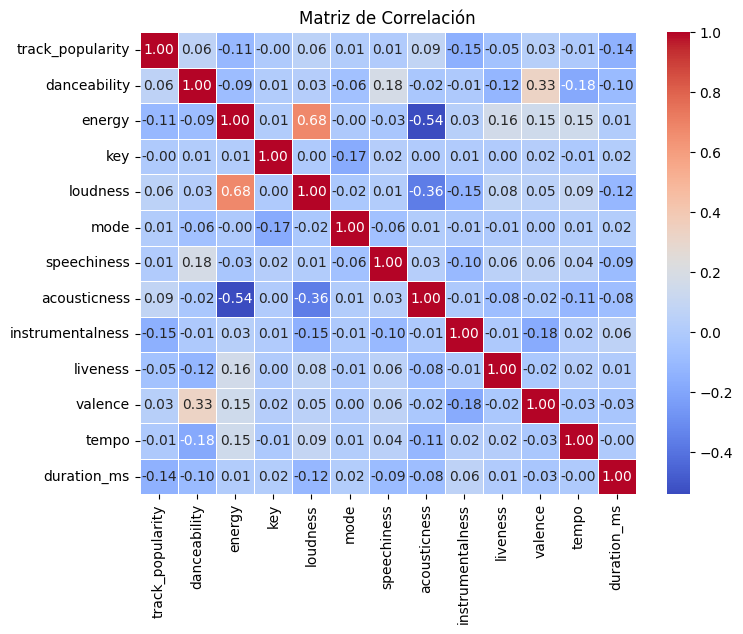

In [8]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Corroboramos la baja correlación entre la  mayoría de los features.

En los casos que se aprecia una correlación mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sintéticas, construidas en función de 'loudness' (parámetro acústico) y otras características del audio.

En el caso de 'valence/danceability' expresa una relación entre la música bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlación con todas las variables.
Sólo se aprecia una relación levemente mayor para: instrumentalness, duration_ms y energy.

Cabe destacar que todas estas correlaciones son mínimas (menores a +/- 0.15).



Analizamos la distribución de los datos dado que observamos que algunos valores se encontraban con una distribución sesgada.

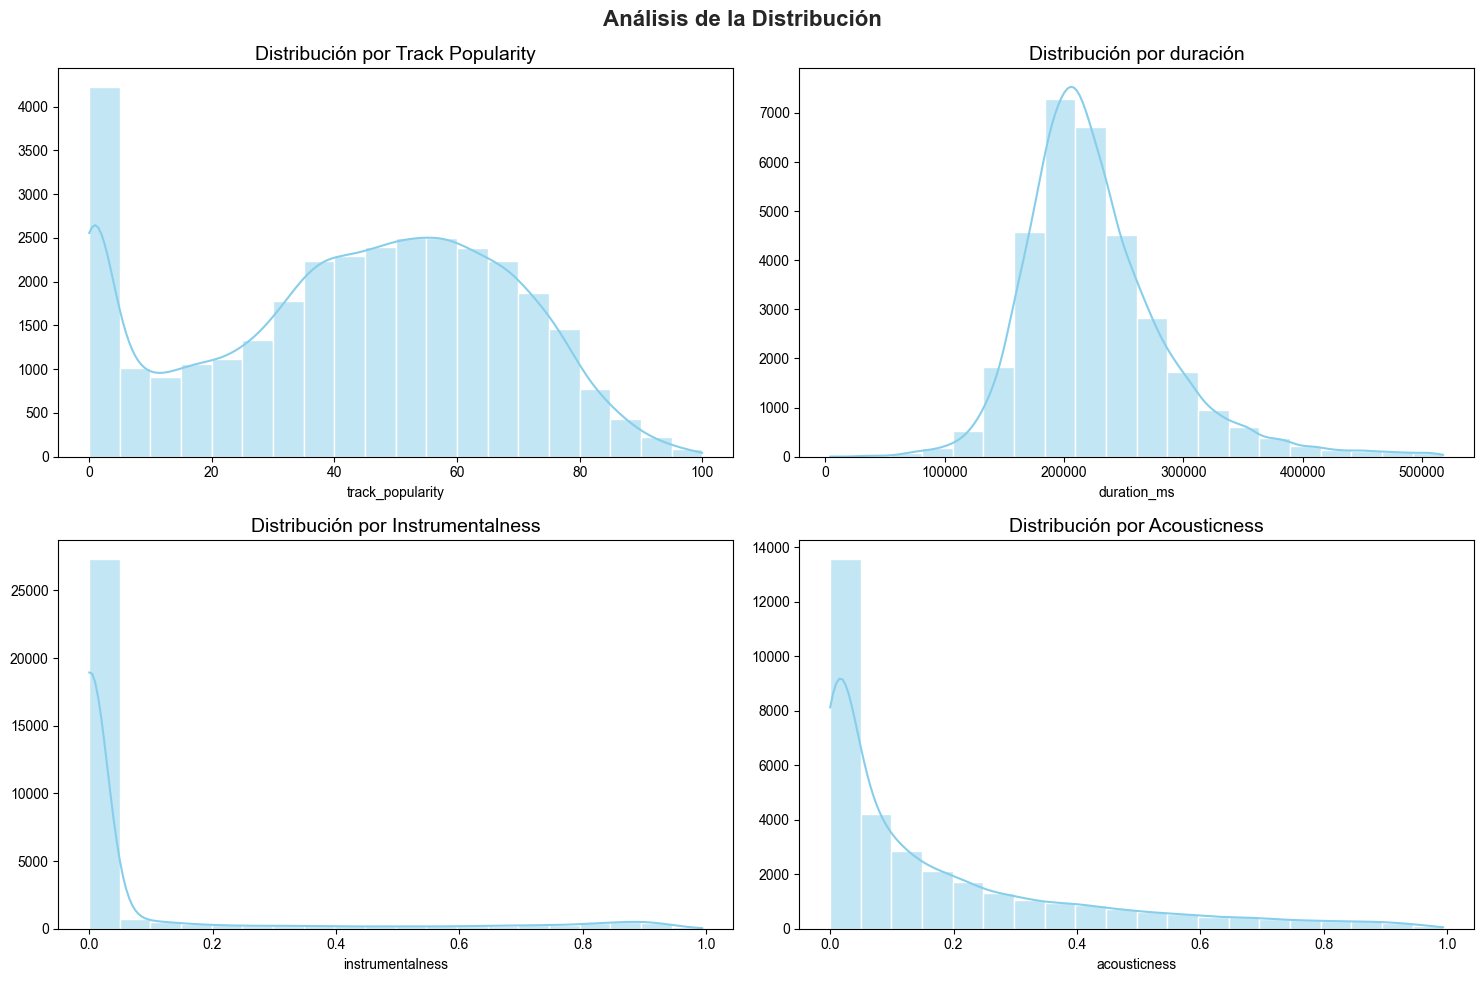

In [9]:
# Análisis de la distribución

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribución por duración', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran número de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayoría de las canciones tienen una duración de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribución de cola larga.

Tanto 'instrumentalness' como 'acousticness' están muy sesgados hacia la izquierda.

Para los violin plot, separamos las variables 'duration_ms', 'tempo' y 'track_popularity' por tener un rango diferente que impide la visualización.

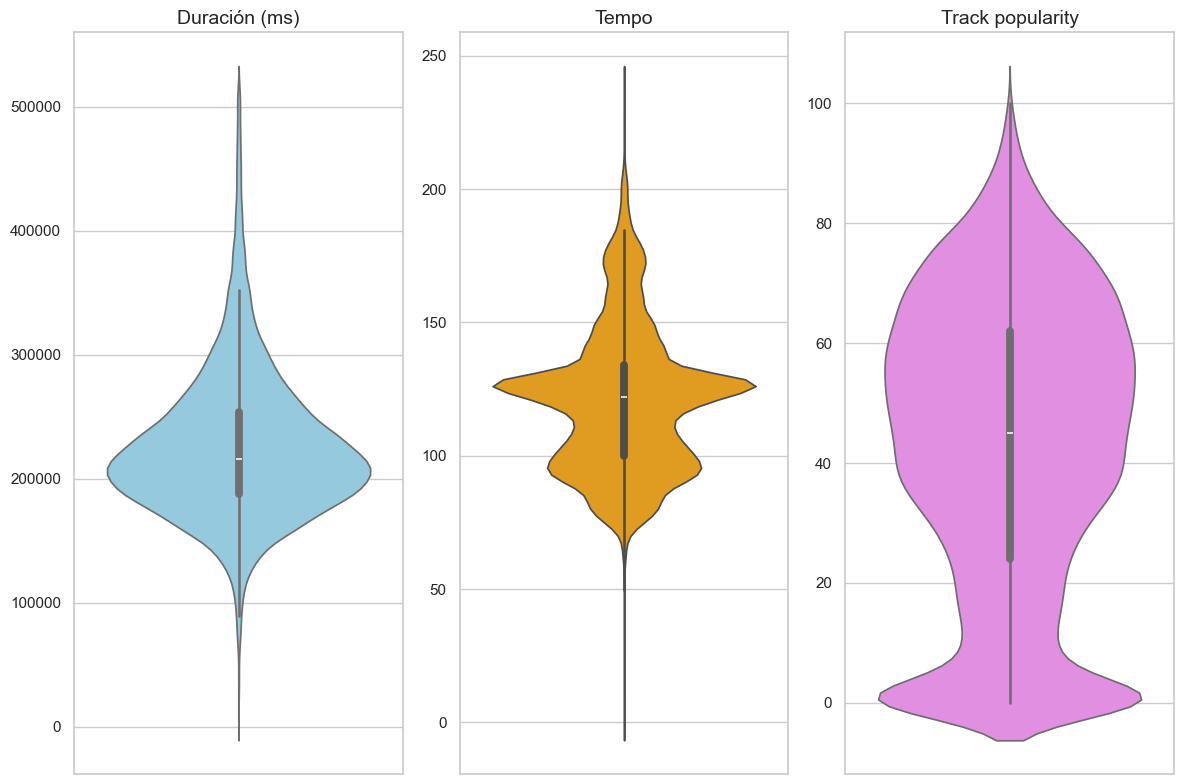

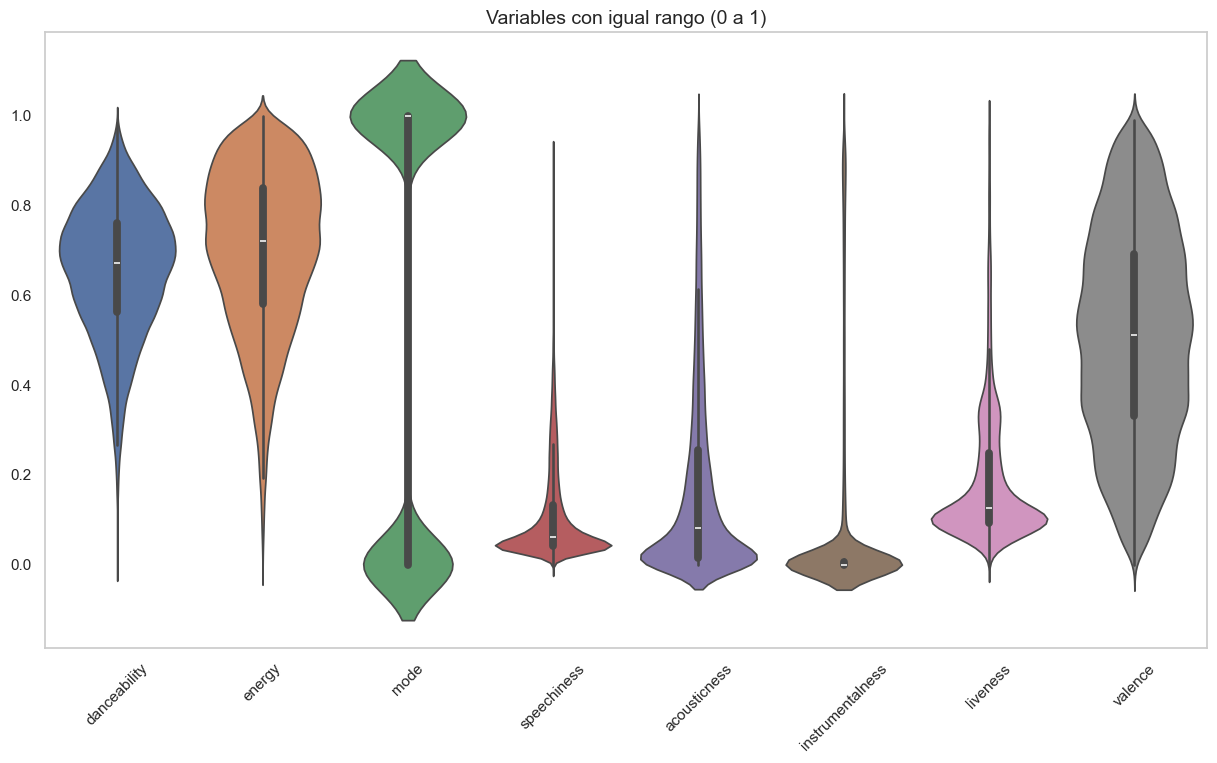

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

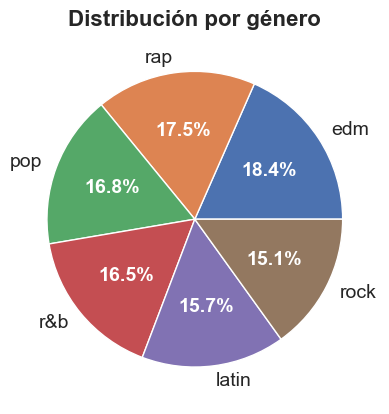

In [11]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

In [12]:
#Análisis de la distribución por año
def año_lanzamiento(date):
    if len(date) == 4:
        año = date
        return año
    else:
        año = pd.to_datetime(date, errors='coerce').year
        return año

In [13]:
# Creaamos un campo year en base al track_album_release_date
df['year'] = df['track_album_release_date'].apply(año_lanzamiento).astype(int)

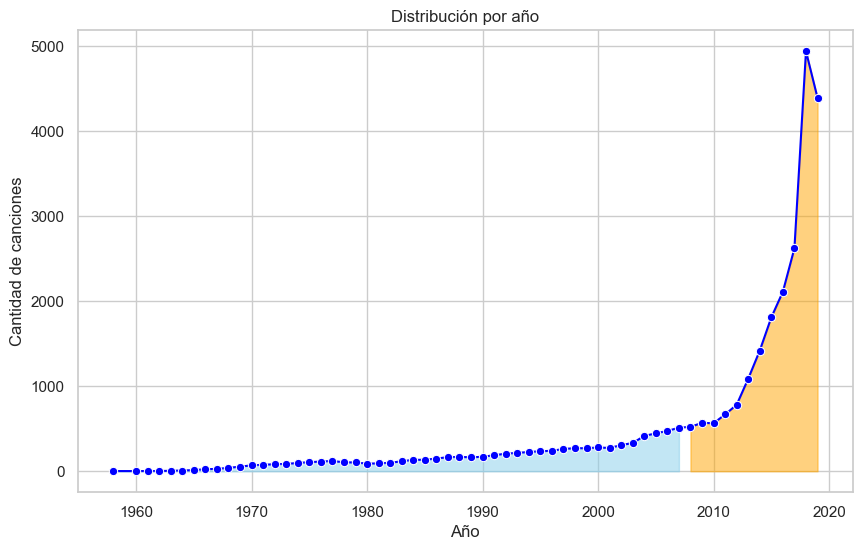

In [14]:
# Graficamos la distribución de canciones por año

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por año (en Spotify) aumenta notablemente. Es importante destacar que la aplicación se encuentra disponible desde 2008. Las canciones publicadas antes de este año podría estar sufriendo un sesgo de supervivencia (sólo se agregan las canciones que han perdurado).

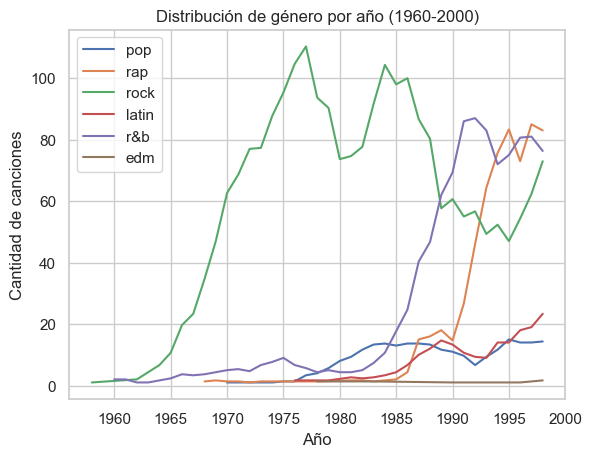

In [15]:
#Distribución de género por año
genres = df['playlist_genre'].unique()
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evolución de los distintos géneros a través de los años.

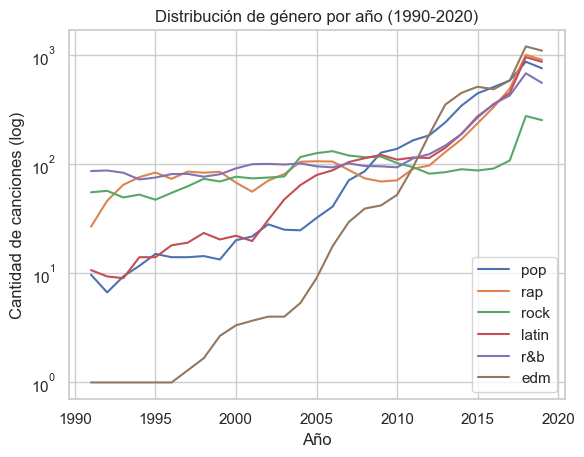

In [16]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del género 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los géneros.

## Limpieza del Dataset

### Identificación de valores nulos

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
liveness            0
valence             0
tempo               0
duration_ms         0
year                0
Length: 24, dtype: int64


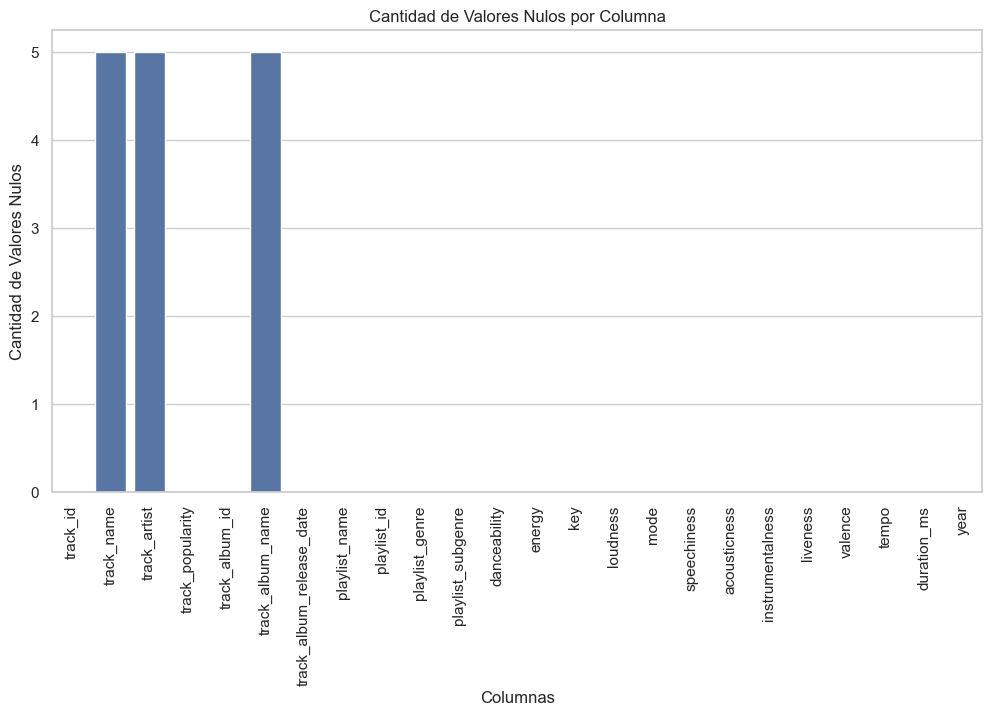

In [17]:
# Vemos la cantidad de valores nulos por cada campo
null_counts = df.isnull().sum()
print(null_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)
plt.show()

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [18]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,2017
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,2017
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,2012
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012


Se observó que los features musicales tenían valores normales en relación al resto del dataset. Por ese motivo se decidió conservar estas canciones.

### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [19]:
# Búsqueda de duplicados
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
3ZCTVFBt2Brf31RLEnCkWJ     8
6oJ6le65B3SEqPwMRNXWjY     8
                          ..
27F9FlipD657qYRQT3qxFm     2
5N5k9nd479b1xpDZ4usjrg     2
3kgKVcBpBGuSeaEC0AZGlb     2
1BmdqDrBU5eohtRwHBls6C     2
4JxXwBcVpVGDAnY4tKcAFH     2
Name: count, Length: 3166, dtype: int64


In [20]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,post-teen pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,electropop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,indie poptimism,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,southern hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,tropical,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,hip pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,pop edm,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016


Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [21]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [22]:
# Verificación
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [23]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Con base en el histograma anterior de distribución de 'track_popularity' se determinó realizar un corte de los valores menores a 10, por ser el límite de separación de ambos picos.

In [24]:
# Eliminamos las canciones con track_popularity menor a 10
df = df[df['track_popularity'] > 10]

In [25]:
# Verificamos la eliminación de canciones con track_popularity menor a 10
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

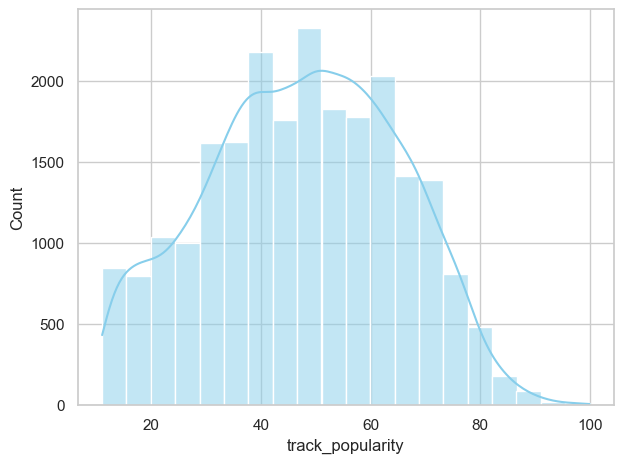

In [26]:
# Verificamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Variable tempo

In [27]:
# Detección de outliers por método del desvío estándar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Copiamos el DataFrame original para comparar
df_original = df.copy()

# Eliminamos las canciones con tempo fuera de los límites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los límites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los límites de tempo.


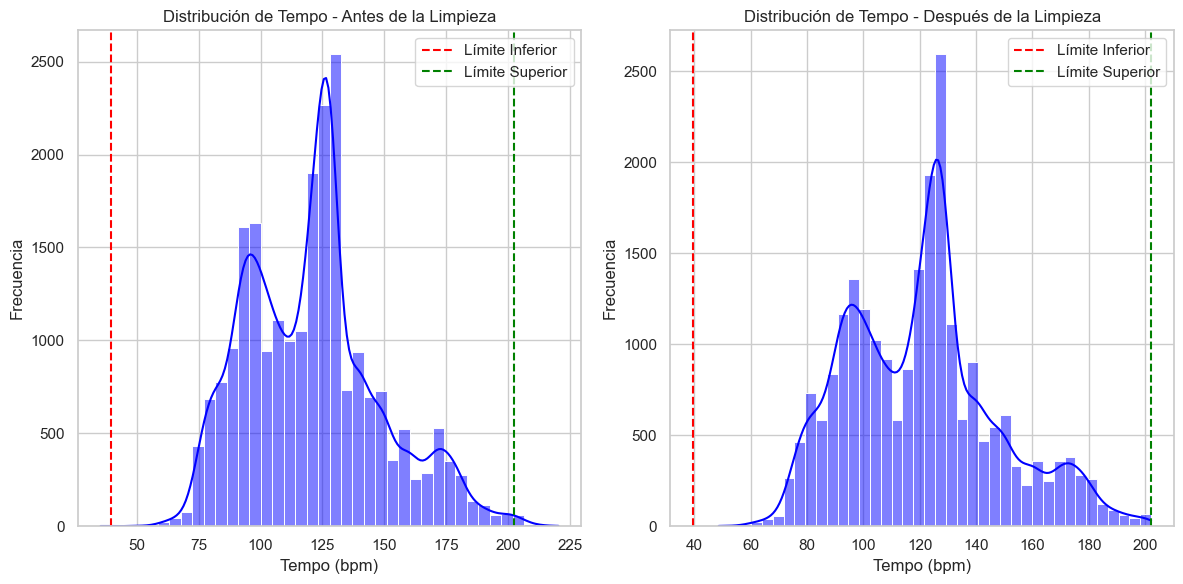

In [28]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Antes de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Después de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable duracion_ms

In [29]:
# Detección de outliers con método del rango intercuartílico (IQR)
# Análisis por cuartiles
df_original = df.copy()
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Análisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [30]:
print('Análisis por cuartiles:')
print('Límite inferior ',lower)
print('Límite superior ',upper)

Análisis por cuartiles:
Límite inferior  88289.75
Límite superior  347783.75


In [31]:
print('Análisis por percentiles:')
print('Límite inferior ',lower_per)
print('Límite superior ',upper_per)

Análisis por percentiles:
Límite inferior  73305.0
Límite superior  372711.8


Decidimos realizar el corte únicamente por el percentil inferior. Es decir, pistas con una duración menor a 1,2 min.

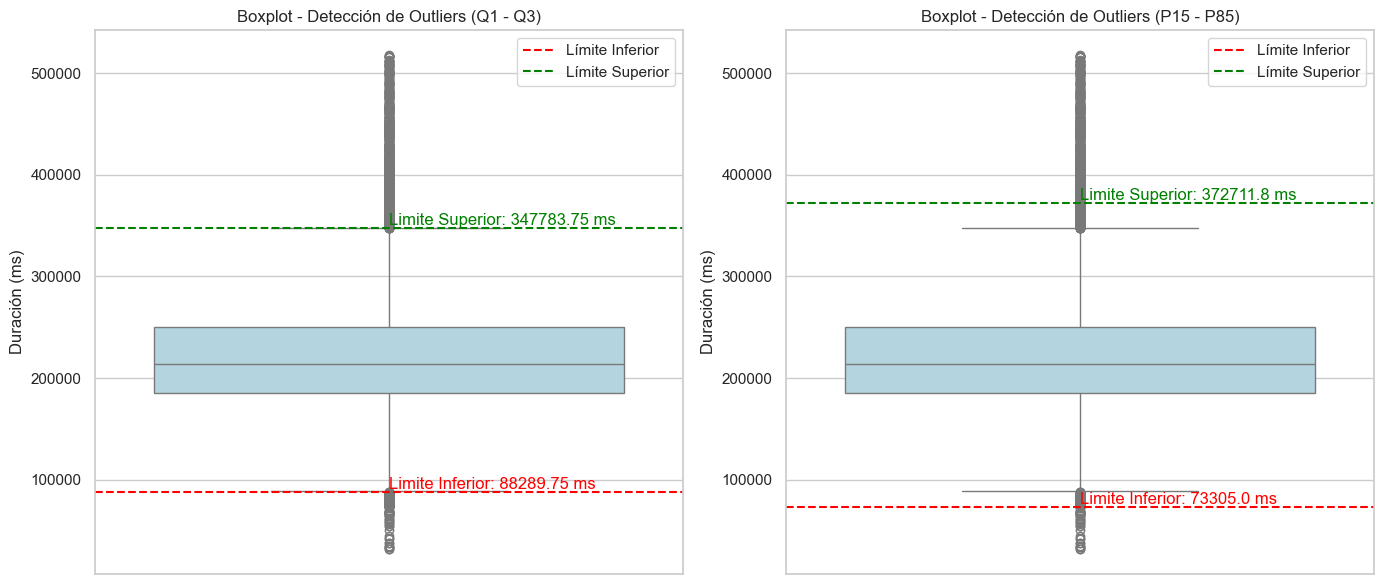

In [32]:
# Crear el gráfico
plt.figure(figsize=(14, 6))

# Boxplot para el análisis IQR
plt.subplot(1, 2, 1)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (Q1 - Q3)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites
plt.text(0, lower, f'Limite Inferior: {round(lower, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper, f'Limite Superior: {round(upper, 2)} ms', color='green', verticalalignment='bottom')

# Boxplot para el análisis por percentiles
plt.subplot(1, 2, 2)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower_per, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper_per, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (P15 - P85)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites para percentiles
plt.text(0, lower_per, f'Limite Inferior: {round(lower_per, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper_per, f'Limite Superior: {round(upper_per, 2)} ms', color='green', verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [33]:
# Eliminamos las canciones con duración fuera de los límites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del límite de duración.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del límite de duración.


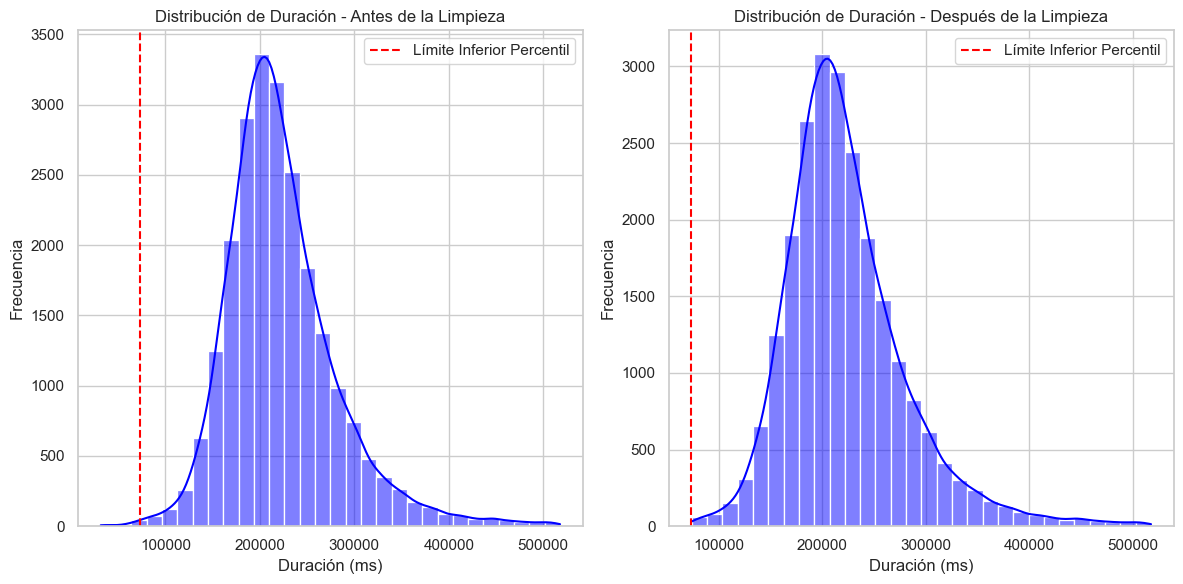

In [34]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Antes de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Después de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [35]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
df_original = df.copy()
loudness_threshold = -30
low_loudness_counts = df['loudness'] < loudness_threshold
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [36]:
df[df['loudness'] < loudness_threshold]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
17008,34v7cD6VR3fVYguedQ1wuh,Tropical Forest,The Sleep Specialist,54,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.3110,0.377000,3,-36.509,0,0.0366,0.1290,0.979,0.2470,0.0388,84.122,117449,2017
17010,28ilcqErfNjitJ7T3byHoX,Peaceful Forest,The Sleep Specialist,51,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2110,0.425000,7,-46.448,0,0.0542,0.8800,0.613,0.1840,0.0122,116.884,181204,2017
17016,61SiFnjiY36uVSTBVXK5Yw,The Sound Of The Jungle With Coloured Birds Fo...,Life Sounds Nature,44,5qukUq6sBLjghcEcFOdgKP,"The Very Best Sound Of Nature - Birds, Waves, ...",2015-04-01,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2260,0.442000,11,-36.624,0,0.0562,0.0509,0.136,0.0791,0.0234,77.998,93010,2015
17018,5iAB4tlYseBES4MKqgY4KG,Relaxing Crickets And Waterfall,Natural Sound Makers,52,2GLxsxoWpW8MOw9O9AAsf9,Forest By Night,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.0787,0.000175,7,-35.960,1,0.0580,0.1180,0.972,0.0793,0.0116,169.062,264154,2017


Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [37]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > loudness_threshold ]

In [38]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

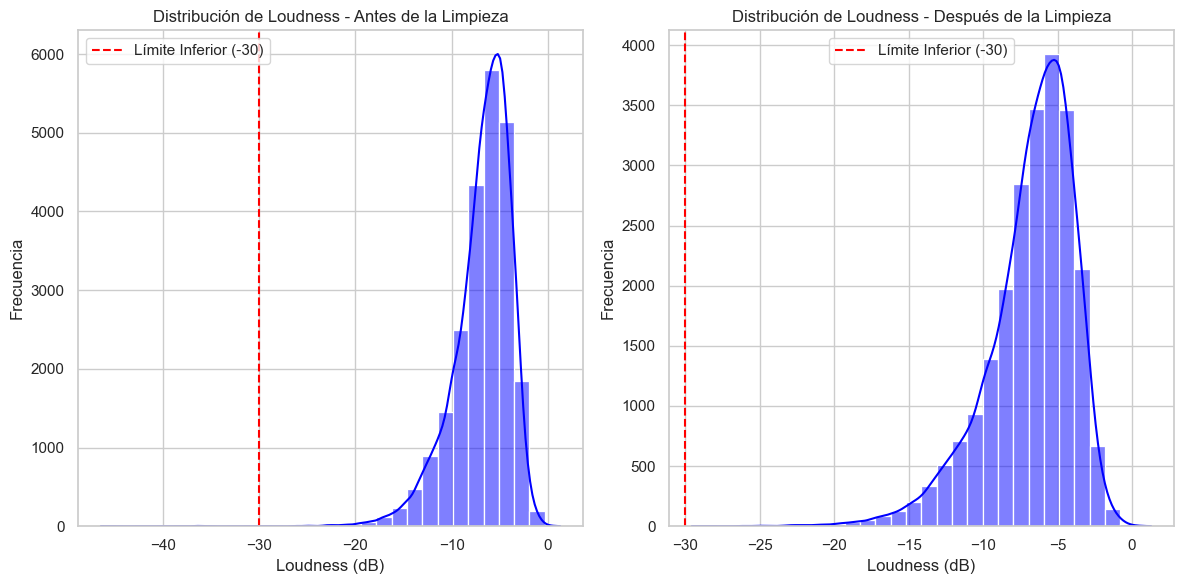

In [39]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Antes de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Después de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

## Transformación de Variables y Selección de Features

### Eliminación de features string

Eliminamos los features string que describen la pista, el album o la playlist. Únicamente conservamos 'track_id' para referencia y 'playlist_genre' que será usada más adelante.

In [40]:
df.drop(columns=['track_name', 'track_artist', 'track_album_id', 'track_album_name',  'playlist_subgenre', 'track_album_release_date', 'playlist_name', 'playlist_id'], inplace=True)

### Escalado de features numéricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [41]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,0.411510,0.656292,0.692901,5.353104,0.737928,0.566613,0.107680,0.183468,0.085304,0.188438,0.509312,0.469421,0.336007,0.864567
std,0.197534,0.145038,0.183074,3.617693,0.096845,0.495554,0.102151,0.225487,0.225892,0.152531,0.232680,0.173978,0.131468,0.181737
min,0.000000,0.077100,0.011800,0.000000,0.000000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.564000,0.573000,2.000000,0.690556,0.000000,0.040900,0.016100,0.000000,0.092700,0.329000,0.334020,0.252155,0.825397
50%,0.415730,0.673000,0.716000,6.000000,0.755643,1.000000,0.062400,0.085800,0.000016,0.126000,0.510000,0.477115,0.315769,0.952381
75%,0.561798,0.762000,0.836000,9.000000,0.805520,1.000000,0.133000,0.272000,0.004810,0.243000,0.691000,0.558260,0.398182,0.984127
max,1.000000,0.983000,1.000000,11.000000,1.000000,1.000000,0.918000,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


### Corrección de skewness

Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.

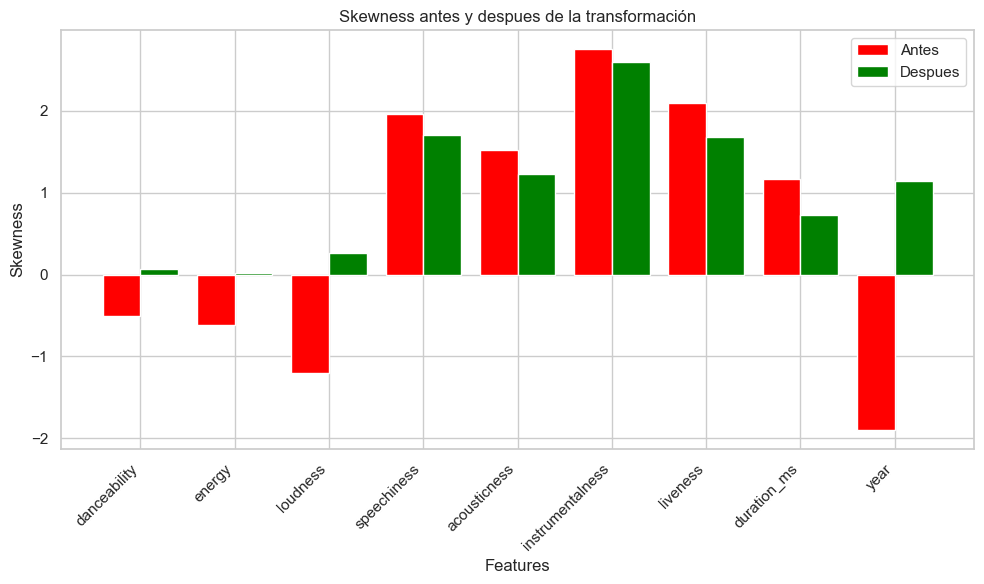

In [42]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)

#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

### Análisis de Tonalidad ('Key')

Aplicamos One Hot Encoding para crear variables dummies del feature 'key' (cada entero representa una tonalidad diferente). 

In [43]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

Observamos la correlación de cada tonalidad con 'track_popularity'

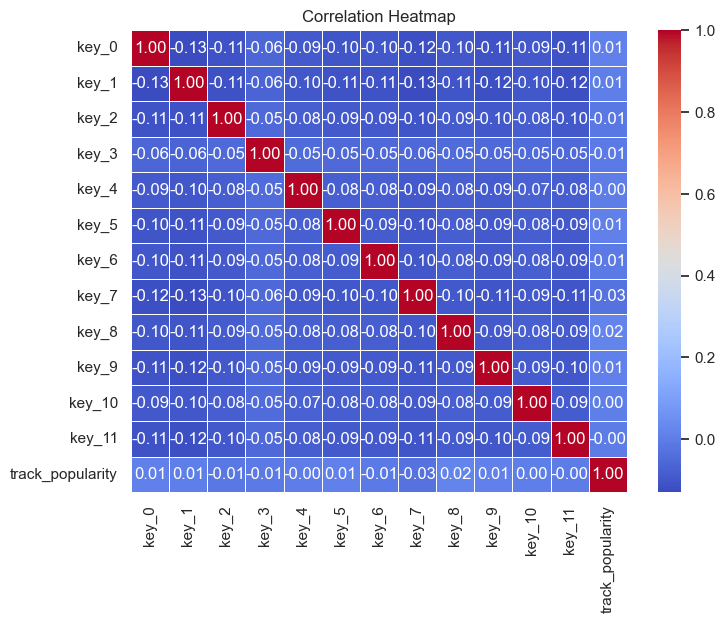

In [44]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]


corr_matrix = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dado que la tonalidad (key) no presenta correlación con 'track_popularity' será desestimada.

In [45]:
df_scaled.drop(columns=['key'], inplace=True)

### One Hot Encoding para género

In [46]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

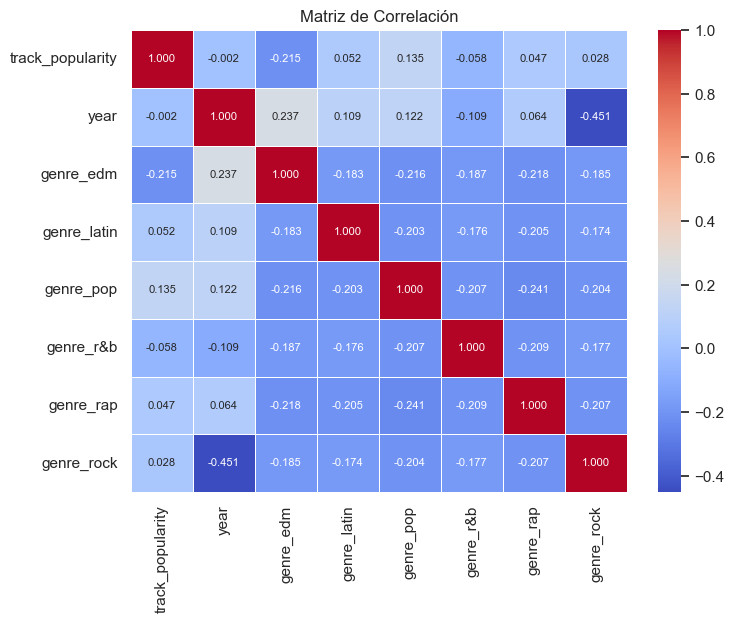

In [47]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])
numeric_df.drop(columns=['danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación entre el año y el género, particularmente "rock" y "edm". Esto se debe a que la cantidad de pistas de "rock" ha disminuido con los años.

"Edm" aparece en el dataset a partir del 2000, siendo el género más reciente.

In [48]:
#Exportamos dataset escalado con selección de features
df_scaled.to_csv('df_scaled.csv', index=False)

## Reducción de la Dimensionalidad

### PCA (6 componentes)

En un primer lugar, comenzamos realizando un analisis de PCA para intentar reducir la cantidad de features de nuestro dataset sin perder una cantidad significativa de información. Para esto, utilizamos la función 'pca.explained_variance_ratio_' que nos permite encontrar que tanta varianza de 'track_popularity' es explicada por estas nuevas features

In [62]:
df_scaled = df_scaled.reset_index(drop=True)

In [63]:
df_scaled

,track_id,track_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
0,6f807x0ima9a1j3VPbc7VN,0.617978,0.559504,0.839056,0.665871,1,0.056664,0.097127,0.000000,0.063256,0.5180,0.477903,0.240945,0.953133,False,False,True,False,False,False
1,0r7CVbZTWZgbTCYdfa2P31,0.629213,0.527076,0.664225,0.507233,1,0.036621,0.069899,0.004201,0.305276,0.6930,0.334085,0.182352,0.953133,False,False,True,False,False,False
2,1z1Hg7Vb0AhHDiEmnDE79l,0.662921,0.455625,0.866761,0.608407,0,0.071576,0.076405,0.000023,0.104360,0.6130,0.490757,0.208316,0.953133,False,False,True,False,False,False
3,75FpbthrwQmzHlBJLuGdC7,0.550562,0.515524,0.864900,0.584556,1,0.097127,0.028296,0.000009,0.185649,0.2770,0.477382,0.194464,0.953133,False,False,True,False,False,False
4,1e8PAfcKUYoKkxPhrHqw4x,0.651685,0.422500,0.693889,0.525833,1,0.035271,0.077239,0.000000,0.080012,0.7250,0.490549,0.230801,0.953133,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23076,7bxnKAamR3snQ1VGLuVfC1,0.348315,0.183184,0.850084,0.728575,1,0.089475,0.073808,0.000000,0.064664,0.2100,0.517886,0.257829,0.740633,True,False,False,False,False,False
23077,5Aevni09Em4575077nkWHz,0.101124,0.272484,0.617796,0.539256,1,0.041142,0.001709,0.004261,0.318454,0.4000,0.517045,0.488030,0.702332,True,False,False,False,False,False
23078,7ImMqPP3Q1yfUHvsdn7wEo,0.033708,0.279841,0.674041,0.511577,0,0.046979,0.102557,0.000001,0.139762,0.4360,0.516706,0.267764,0.740633,True,False,False,False,False,False
23079,2m69mhnfQ1Oq6lGtXuYhgX,0.044944,0.391876,0.788544,0.613380,1,0.103459,0.007889,0.119559,0.294906,0.3080,0.516830,0.507622,0.740633,True,False,False,False,False,False


In [64]:
numerical_features = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'year']

"""
NOTAS:
1) Deben estar presentes 'energy', 'instrumentalness', 'duration_ms'; por ser las que presentan mayor correlación con 'track_popularity'
2) Descartado 'mode' por baja correlación general
3) Eliminación 'acousticness' por alta correlación con 'energy' y 'loudness':
       Incremento de varianza eliminando:
       'energy' -> +1,32%
       'loudness' -> +1,94%
       'acousticness' -> +4,07%
4) Eliminación 'duration_ms' por tener correlación con 'year':
       Incremento de varianza eliminando:
       'year' -> +3,13%
       'duration_ms' -> +5,5%
5) NO SE INCLUYE OneHot de 'Genre'
"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled[numerical_features])

pca = PCA(n_components=6)  # Reducción a 6 componentes principales
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['track_id'] = df_scaled['track_id']
pca_df['track_popularity'] = df_scaled['track_popularity']

In [65]:
explained_variance = pca.explained_variance_ratio_
for i in range(len(pca_df.columns[:-2])):
    print(f'Varianza explicada por el Componente Principal {i+1}: {explained_variance[i]:.2%}')

# Calcular la suma de la varianza de los componentes
sum_variance = sum(explained_variance[:i+1])
print(f'\nSuma de la varianza explicada por los Componentes 1 a {i+1}: {sum_variance:.2%}')

Varianza explicada por el Componente Principal 1: 20.60%
Varianza explicada por el Componente Principal 2: 16.84%
Varianza explicada por el Componente Principal 3: 14.13%
Varianza explicada por el Componente Principal 4: 11.64%
Varianza explicada por el Componente Principal 5: 10.84%
Varianza explicada por el Componente Principal 6: 10.45%

Suma de la varianza explicada por los Componentes 1 a 6: 84.50%


In [66]:
columns = pca_df.columns[:-2]
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=numerical_features, columns=pca_df.columns[:-2])

for i in range(len(columns)):
    print(f"\nVariables que más contribuyen a PC{i}:")
    print(loading_df[columns[i]].abs().sort_values(ascending=False))


Variables que más contribuyen a PC0:
loudness            0.638675
energy              0.637889
tempo               0.249153
liveness            0.239499
year                0.190589
danceability        0.163221
instrumentalness    0.047567
valence             0.022835
speechiness         0.002492
Name: PC0, dtype: float64

Variables que más contribuyen a PC1:
valence             0.612527
danceability        0.573629
speechiness         0.347103
instrumentalness    0.336891
tempo               0.156710
loudness            0.144662
year                0.084336
energy              0.068013
liveness            0.067545
Name: PC1, dtype: float64

Variables que más contribuyen a PC2:
year                0.734673
speechiness         0.352879
danceability        0.345174
valence             0.311222
instrumentalness    0.271956
liveness            0.139857
energy              0.119062
loudness            0.094695
tempo               0.055362
Name: PC2, dtype: float64

Variables que más contri

In [68]:
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,track_id,track_popularity
0,-1.857132,-0.653643,0.621619,-1.263517,-0.596871,-0.812058,6f807x0ima9a1j3VPbc7VN,0.617978
1,-1.010258,-0.698129,-0.014749,-0.410270,1.321001,-0.397733,0r7CVbZTWZgbTCYdfa2P31,0.629213
2,-1.877933,-0.550120,0.252759,-0.883555,-0.459042,-0.552848,1z1Hg7Vb0AhHDiEmnDE79l,0.662921
3,-1.826773,0.102045,0.812300,-0.143904,0.139718,-0.676533,75FpbthrwQmzHlBJLuGdC7,0.550562
4,-1.030455,-0.473479,-0.048592,-1.058530,-0.662907,-0.526060,1e8PAfcKUYoKkxPhrHqw4x,0.651685
...,...,...,...,...,...,...,...,...
23076,-2.397589,1.119227,-0.059800,-0.347088,-0.845068,-1.336459,7bxnKAamR3snQ1VGLuVfC1,0.348315
23077,-1.354424,0.938583,-0.749790,0.535879,0.617978,-0.394758,5Aevni09Em4575077nkWHz,0.101124
23078,-1.033896,0.707011,-0.500979,-0.230325,-0.419068,-0.649763,7ImMqPP3Q1yfUHvsdn7wEo,0.033708
23079,-1.974394,0.655825,0.133420,0.313765,0.711196,0.122901,2m69mhnfQ1Oq6lGtXuYhgX,0.044944


In [69]:
#Exportamos el dataset de PCA con 6 componentes
pca_df.to_csv('df_pca6.csv', index=False)

### PCA (9 componentes)

En un primer lugar, comenzamos realizando un analisis de PCA para intentar reducir la cantidad de features de nuestro dataset sin perder una cantidad significativa de información. Para esto, utilizamos la función 'pca.explained_variance_ratio_' que nos permite encontrar que tanta varianza de 'track_popularity' es explicada por estas nuevas features

In [70]:
numerical_features = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'year', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock']

"""
NOTAS:
1) Deben estar presentes 'energy', 'instrumentalness', 'duration_ms'; por ser las que presentan mayor correlación con 'track_popularity'
2) Descartado 'mode' por baja correlación general
3) Eliminación 'acousticness' por alta correlación con 'energy' y 'loudness':
       Incremento de varianza eliminando:
       'energy' -> +1,32%
       'loudness' -> +1,94%
       'acousticness' -> +4,07%
4) Eliminación 'duration_ms' por tener correlación con 'year':
       Incremento de varianza eliminando:
       'year' -> +3,13%
       'duration_ms' -> +5,5%
5) SE INCLUYE OneHot de 'Genre' (descartando un feature por ser dummies)
"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled[numerical_features])

pca = PCA(n_components=9)  # Reducción a 9 componentes principales
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df['track_id'] = df_scaled['track_id']
pca_df['track_popularity'] = df_scaled['track_popularity']

In [71]:
explained_variance = pca.explained_variance_ratio_
for i in range(len(pca_df.columns[:-2])):
    print(f'Varianza explicada por el Componente Principal {i+1}: {explained_variance[i]:.2%}')

# Calcular la suma de la varianza de los componentes
sum_variance = sum(explained_variance[:i+1])
print(f'\nSuma de la varianza explicada por los Componentes 1 a {i+1}: {sum_variance:.2%}')

Varianza explicada por el Componente Principal 1: 14.84%
Varianza explicada por el Componente Principal 2: 14.03%
Varianza explicada por el Componente Principal 3: 11.09%
Varianza explicada por el Componente Principal 4: 10.37%
Varianza explicada por el Componente Principal 5: 8.31%
Varianza explicada por el Componente Principal 6: 7.91%
Varianza explicada por el Componente Principal 7: 6.96%
Varianza explicada por el Componente Principal 8: 6.68%
Varianza explicada por el Componente Principal 9: 6.17%

Suma de la varianza explicada por los Componentes 1 a 9: 86.37%


In [73]:
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,track_id,track_popularity
0,-1.228247,-2.007737,0.636795,-1.357469,-1.137151,-1.301107,-0.040412,-0.705792,-0.603308,6f807x0ima9a1j3VPbc7VN,0.617978
1,-0.814656,-1.237786,0.390595,-1.321949,-1.275996,-0.900223,1.379120,0.766448,0.605321,0r7CVbZTWZgbTCYdfa2P31,0.629213
2,-1.380825,-1.835965,0.500640,-1.146859,-1.218530,-1.204166,-0.001245,-0.475784,-0.197209,1z1Hg7Vb0AhHDiEmnDE79l,0.662921
3,-1.276420,-1.840713,1.212820,-0.632802,-1.227607,-0.654282,0.240339,0.151130,-0.227065,75FpbthrwQmzHlBJLuGdC7,0.550562
4,-1.036401,-1.130778,0.537385,-1.468597,-1.034739,-1.504985,-0.175239,-0.388876,0.052818,1e8PAfcKUYoKkxPhrHqw4x,0.651685
...,...,...,...,...,...,...,...,...,...,...,...
23076,-2.032147,-1.249670,0.612877,0.407373,-0.416287,0.718305,-0.800785,-0.617422,-1.734487,7bxnKAamR3snQ1VGLuVfC1,0.348315
23077,-1.455409,-0.401508,0.262572,0.403759,-0.395744,0.920737,0.264700,0.628280,0.177206,5Aevni09Em4575077nkWHz,0.101124
23078,-1.195079,-0.326452,0.268371,0.038108,-0.158542,0.353903,-0.403733,-0.186924,-0.545752,7ImMqPP3Q1yfUHvsdn7wEo,0.033708
23079,-1.397474,-1.253266,0.346222,0.696516,-0.171992,1.010590,0.605149,-0.055784,-0.008036,2m69mhnfQ1Oq6lGtXuYhgX,0.044944


In [74]:
#Exportamos el dataset de PCA con 9 componentes
pca_df.to_csv('df_pca9.csv', index=False)

# Entrenamiento de modelos

In [9]:
# Librerías necesarias
import pandas as pd
import time
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error,
                             mean_absolute_percentage_error)

In [10]:
df = pd.read_csv('df_scaled.csv')

In [11]:
y = df['track_popularity']
X = df.drop(columns=['track_popularity','track_id'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se entrenaron diferentes modelos de regresión.
Cada uno de estos modelos se encuentra en un notebook independiente, donde pueden verse el proceso de desarrollo y encontrarse las distintas pruebas que fuimos realizando para cada modelo.

Realizamos distintos tipos de búsqueda para encontrar los hiperparámetros óptimos para cada arquitectura. Una vez entrenados, fueron almacenados los mejores modelos en archivos .pkl para poder realizar las predicciones de prueba en este notebook y comprar su desempeño.

## Ridge Regression

Entrenamos una regresión lineal de Ridge para comparar las métricas.

In [13]:
from sklearn.linear_model import Ridge

ridge_hitters = Ridge()

grid_ridge = GridSearchCV(ridge_hitters,
                    {"alpha": np.linspace(0, 20, 1000)},
                    refit=True,
                    cv=5,
                    verbose=2,
                    scoring='neg_mean_absolute_error')
grid_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................alpha=0.02002002002002002; total time=   0.0s
[CV] END ..........................alpha=0.02002002002002002; total time=   0.0s
[CV] END ..........................alpha=0.02002002002002002; total time=   0.0s
[CV] END ..........................alpha=0.02002002002002002; total time=   0.0s
[CV] END ..........................alpha=0.02002002002002002; total time=   0.0s
[CV] END ..........................alpha=0.04004004004004004; total time=   0.0s
[CV] END ..........................alpha=0.0

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.5...
       19.41941942, 19.43943944, 19.45945946, 19.47947948, 19.4994995 ,
       19.51951952, 19.53953954, 19.55955956, 19.57957958, 19.5995996 ,
       19.61961962, 19.63963964, 19.65965966, 19.67967968, 19.6996997 ,
       19.71971972, 19.73973974, 19.75975976, 19.77977978, 19.7997998 ,
       19.81981982, 19.83983984, 19.85985986, 19.87987988, 19.8998999 ,
       19.91991992, 19.93993994, 19.95995996, 19.97997998, 20.        ])},
             scoring='neg_mean_absolute_error', verbose=2)

In [14]:
ridge_start_time = time.time()

ridge_hitters = grid_ridge.best_estimator_

y_pred = ridge_hitters.predict(X_test)
y_pred_ridge = y_pred

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ridge_end_time = time.time()
ridge_time = ridge_end_time - ridge_start_time
print(f"Tiempo de ejecución: {ridge_time}")

Tiempo de ejecución: 0.004134654998779297


In [15]:
# Imprimir las métricas
print("Métricas del mejor modelo de Ridge")
print(f"- MAE de testeo fue: {mae:.5f}")
print(f"- RMSE de testeo fue: {rmse:.5f}")
print(f"- MAPE de testeo fue: {mape:.3e}")
print(f"- R2 de testeo fue: {r2:.5f}")

Métricas del mejor modelo de Ridge
- MAE de testeo fue: 0.15286
- RMSE de testeo fue: 0.18614
- MAPE de testeo fue: 1.082e+13
- R2 de testeo fue: 0.10833


## Support Vector Regressor

In [16]:
# Descarga de los parámetros del modelo
with open('models/svr_rbf.pkl', 'rb') as f:
    loading_model = pickle.load(f)
loading_model

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVR from version 1.4.1.post1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SVR(C=50.808090296938666, gamma=0.07691862572278974)

In [17]:
start_time = time.time()

# Realizar predicciones en el conjunto de prueba
y_pred = loading_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

end_time = time.time()

In [18]:
svr_time = end_time - start_time
print(f"Tiempo de ejecución: {svr_time}")

Tiempo de ejecución: 2.763780117034912


In [19]:
# Imprimir las métricas
print("Métricas del mejor modelo de SVR")
print(f"- MAE de testeo fue: {mae:.5f}")
print(f"- RMSE de testeo fue: {rmse:.5f}")
print(f"- MAPE de testeo fue: {mape:.3e}")
print(f"- R2 de testeo fue: {r2:.5f}")

Métricas del mejor modelo de SVR
- MAE de testeo fue: 0.14748
- RMSE de testeo fue: 0.18347
- MAPE de testeo fue: 1.094e+13
- R2 de testeo fue: 0.13376


## Decision Tree Regressor

In [20]:
# Descarga de los parámetros del modelo
with open('models/decisionTreeRegressor.pkl', 'rb') as f:
    loading_model = pickle.load(f)
loading_model

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


DecisionTreeRegressor(ccp_alpha=0.001002004008016032, random_state=42)

In [21]:
start_time = time.time()

# Realizar predicciones en el conjunto de prueba
y_pred = loading_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

end_time = time.time()

In [22]:
dt_time = end_time - start_time
print(f"Tiempo de ejecución: {dt_time}")

Tiempo de ejecución: 0.002999544143676758


In [23]:
# Imprimir las métricas
print("Métricas del mejor modelo de DT")
print(f"- MAE de testeo fue: {mae:.5f}")
print(f"- RMSE de testeo fue: {rmse:.5f}")
print(f"- MAPE de testeo fue: {mape:.3e}")
print(f"- R2 de testeo fue: {r2:.5f}")

Métricas del mejor modelo de DT
- MAE de testeo fue: 0.15827
- RMSE de testeo fue: 0.19185
- MAPE de testeo fue: 1.082e+13
- R2 de testeo fue: 0.05284


## K-Nearest Neighbors Regressor

In [24]:
# Descarga de los parámetros del modelo
with open('models/KNeighborsRegressor.pkl', 'rb') as f:
    loading_model = pickle.load(f)
loading_model

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


KNeighborsRegressor(n_neighbors=11, p=6.0, weights='distance')

In [25]:
start_time = time.time()

# Realizar predicciones en el conjunto de prueba
y_pred = loading_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

end_time = time.time()

In [26]:
knn_time = end_time - start_time
print(f"Tiempo de ejecución: {knn_time}")

Tiempo de ejecución: 2.2393927574157715


In [27]:
# Imprimir las métricas
print("Métricas del mejor modelo de KNN")
print(f"- MAE de testeo fue: {mae:.5f}")
print(f"- RMSE de testeo fue: {rmse:.5f}")
print(f"- MAPE de testeo fue: {mape:.3e}")
print(f"- R2 de testeo fue: {r2:.5f}")

Métricas del mejor modelo de KNN
- MAE de testeo fue: 0.15376
- RMSE de testeo fue: 0.19162
- MAPE de testeo fue: 1.091e+13
- R2 de testeo fue: 0.05506


## Neural Network

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

df_pca = pd.read_csv('df_scaled.csv')

numerical_features = ['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


X = df_pca[numerical_features].values
y = df_pca['track_popularity'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Deje este escalado estandar porque mejora los resultados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversion a tensores de pytorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



# Modelo 3
class MusicNet(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, output_size):
        super(MusicNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


input_size = 7  
hidden_size = 128  
dropout_rate = 0.3  
output_size = 1  


model = MusicNet(input_size, hidden_size, dropout_rate, output_size)


model_load_path = "models/best_musicnet_model.pth"
model.load_state_dict(torch.load(model_load_path))

model.eval()
print("Model loaded successfully from:", model_load_path)


Model loaded successfully from: models/best_musicnet_model.pth


In [29]:
start_time = time.time()

# Realizar predicciones en el conjunto de prueba
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze().numpy()

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  
r2 = r2_score(y_test, y_pred)

end_time = time.time()

C:\Users\Martin\AppData\Local\Temp\ipykernel_13732\2263050892.py:11: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [30]:
nn_time = end_time - start_time
print(f"Tiempo de ejecución: {nn_time}")

Tiempo de ejecución: 0.07205796241760254


In [31]:
# Imprimir las métricas
print("Métricas del mejor modelo de NN")
print(f"- MAE de testeo fue: {mae:.5f}")
print(f"- RMSE de testeo fue: {rmse:.5f}")
print(f"- MAPE de testeo fue: {mape:.3e}")
print(f"- R2 de testeo fue: {r2:.5f}")

Métricas del mejor modelo de NN
- MAE de testeo fue: 0.16079
- RMSE de testeo fue: 0.19399
- MAPE de testeo fue: inf
- R2 de testeo fue: 0.03153


## Conclusiones



Métricas del mejor modelo de Ridge
- MAE de testeo fue: 0.15286
- RMSE de testeo fue: 0.18614
- MAPE de testeo fue: 1.082e+13
- R2 de testeo fue: 0.10833

In [38]:
print(f"Tiempo de ejecución: {ridge_time:.3f}")

Tiempo de ejecución: 0.004


Métricas del mejor modelo de SVR
- MAE de testeo fue: 0.14748
- RMSE de testeo fue: 0.18347
- MAPE de testeo fue: 1.094e+13
- R2 de testeo fue: 0.13376

In [39]:
print(f"Tiempo de ejecución: {svr_time:.3f}")

Tiempo de ejecución: 2.764


Métricas del mejor modelo de KNN
- MAE de testeo fue: 0.15377
- RMSE de testeo fue: 0.19162
- MAPE de testeo fue: 1.091e+13
- R2 de testeo fue: 0.05505

In [40]:
print(f"Tiempo de ejecución: {knn_time:.3f}")

Tiempo de ejecución: 2.239


Métricas del mejor modelo de DT
- MAE de testeo fue: 0.15827
- RMSE de testeo fue: 0.19185
- MAPE de testeo fue: 1.082e+13
- R2 de testeo fue: 0.05284

In [41]:
print(f"Tiempo de ejecución: {dt_time:.3f}")

Tiempo de ejecución: 0.003


Métricas del mejor modelo de NN

- MAE de testeo fue: 0.16079
- RMSE de testeo fue: 0.19399
- MAPE de testeo fue: inf
- R2 de testeo fue: 0.03153

In [42]:
print(f"Tiempo de ejecución: {nn_time:.3f}")

Tiempo de ejecución: 0.072
